# Tides acting on a post- natal kick binary

Study of the impact of tides on non-coplanar binaries

In this notebook we show the comparison between the evolutions presented in Repetto et al. (2014) and ours

### load modules

In [1]:
# auto load modules, no need to restart kernel
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# custom module to read MESA output
from mesa_reader import *

### utility functions

#### 1. group_consecutives

Group lists by consecutive numbers. Useful when having several mass-transfer (MT) phases

In [2]:
def group_consecutives(vals, step=1):
    '''Return list of consecutive lists of numbers from vals (number list)
    '''
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(int(v))
        else:
            run = [int(v)]
            result.append(run)
        expect = int(v) + step
    return result

---

## Low-mass X-ray Binary (LMXB) as in Repetto et al. (2014)

### load data

In [3]:
root_mb = '../data/repetto2014/m1_bh8_a11.5_e0.5_i120_mb'
root_no_mb = '../data/repetto2014/m1_bh8_a11.5_e0.5_i120_no_mb'

lmxb_i120_mb = MesaInfo(f'{root_mb}/binary_history.data')
lmxb_i120_no_mb = MesaInfo(f'{root_no_mb}/binary_history.data')

### load data from Repetto et al. 2014

In [4]:
repetto_t1, repetto_period = np.loadtxt(
    '../data/repetto2014/m1_bh8_a11.5_e0.5_i120_mb/period-dataset.csv',
    delimiter=',', unpack=True
)

repetto_t2, repetto_rotation = np.loadtxt(
    '../data/repetto2014/m1_bh8_a11.5_e0.5_i120_mb/rotation-dataset.csv',
    delimiter=',', unpack=True
)

#### get TAMS age

In [5]:
t_TAMS = 8.5246e+09
print(f'age to TAMS: {t_TAMS:.4e}')

age to TAMS: 8.5246e+09


## plots

### evolution of orbital parameters

### - eccentricity and orbital periods

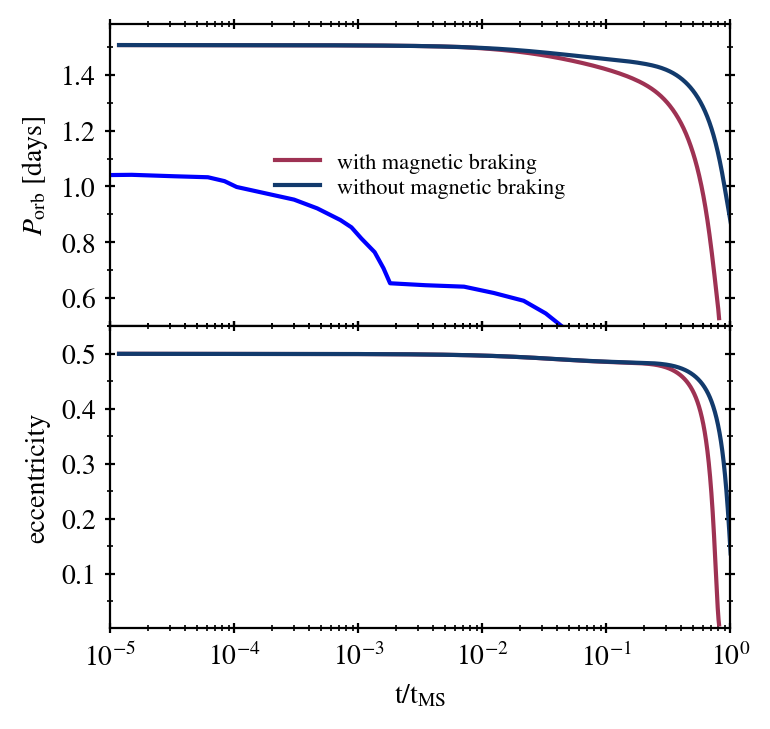

In [6]:
plt.style.use('style.mpl')
fig, axs = plt.subplots(figsize=(4,4), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

axs[-1].set_xlim([1e-5, 1])
axs[-1].set_xlabel('t/t$_{\\rm MS}$')
axs[-1].set_xscale('log')

# first, orbital period
latex = '{\\rm orb}'
axs[0].set_ylabel(f'$P_{latex}$ [days]')

# Repetto et al. 2014 results
axs[0].plot(
    repetto_t1, repetto_period, 
    color='blue', ls='-'
)

# our results
axs[0].plot(
    lmxb_i120_mb.data.age/t_TAMS, lmxb_i120_mb.data.period_days,
    color='#9E3253',
    label='with magnetic braking'
)

axs[0].plot(
    lmxb_i120_no_mb.data.age/t_TAMS, lmxb_i120_no_mb.data.period_days,
    color='#123A6C',
    label='without magnetic braking'
)


# follows the eccentricity
axs[1].set_ylabel('eccentricity')

# our results
axs[1].plot(
    lmxb_i120_mb.data.age/t_TAMS, lmxb_i120_mb.data.eccentricity,
    color='#9E3253',
)

axs[1].plot(
    lmxb_i120_no_mb.data.age/t_TAMS, lmxb_i120_no_mb.data.eccentricity,
    color='#123A6C',
)

# ticks params
axs[0].set_yticks(np.arange(0.4, 1.6, 0.2)); axs[0].set_ylim([0.5, 1.58])
axs[0].yaxis.set_minor_locator(MultipleLocator(0.1))

axs[1].set_yticks(np.arange(0, 0.6, 0.1)); axs[1].set_ylim([0.001, 0.55])
axs[1].yaxis.set_minor_locator(MultipleLocator(0.05));

axs[0].legend();

### - inclination and spin period of each star

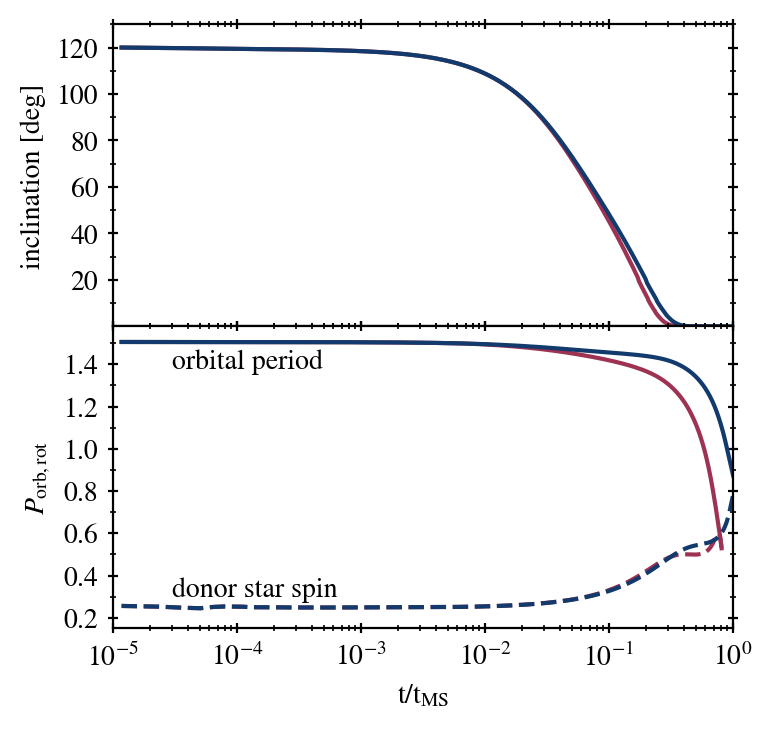

In [7]:
plt.style.use('style.mpl')
fig, axs = plt.subplots(figsize=(4,4), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

axs[-1].set_xlim([1e-5, 1])
axs[-1].set_xlabel('t/t$_{\\rm MS}$')
axs[-1].set_xscale('log')

# first, inclination
axs[0].set_ylabel('inclination [deg]')

axs[0].plot(
    lmxb_i120_mb.data.age/t_TAMS, lmxb_i120_mb.data.inclination_1,
    color='#9E3253', ls='-',
    label='with magnetic braking'
);

axs[0].plot(
    lmxb_i120_no_mb.data.age/t_TAMS, lmxb_i120_no_mb.data.inclination_1,
    color='#123A6C',
    label='without magnetic braking'
);

# finally, the rotational period of the donor star
latex = '{\\rm orb, rot}'
axs[1].set_ylabel(f'$P_{latex}$')

# axs[3].axhline(y=1, ls=':', color='black')
# axs[3].annotate('syncronization', xy=(0.25,0.9))

axs[1].plot(
    lmxb_i120_mb.data.age/t_TAMS, lmxb_i120_mb.data.P_rot_div_P_orb_1 * lmxb_i120_mb.data.period_days,
    color='#9E3253',
    ls='--'
);

axs[1].plot(
    lmxb_i120_mb.data.age/t_TAMS, lmxb_i120_mb.data.period_days,
    color='#9E3253'
);

axs[1].plot(
    lmxb_i120_no_mb.data.age/t_TAMS, lmxb_i120_no_mb.data.P_rot_div_P_orb_1 * lmxb_i120_no_mb.data.period_days,
    color='#123A6C',
    ls='--'
);

axs[1].plot(
    lmxb_i120_no_mb.data.age/t_TAMS, lmxb_i120_no_mb.data.period_days,
    color='#123A6C',
);

# ticks params
axs[0].set_yticks(np.arange(0, 130, 20)); axs[0].set_ylim([0.0001, 130])
axs[0].yaxis.set_minor_locator(MultipleLocator(10))

axs[1].set_yticks(np.arange(0, 1.7, 0.2)); axs[1].set_ylim([0.15, 1.58])
axs[1].yaxis.set_minor_locator(MultipleLocator(0.1))

# annotate spin label
axs[1].annotate('donor star spin', xy=(3e-5, 0.3), color='black');
axs[1].annotate('orbital period', xy=(3e-5, 1.38), color='black');